In [2]:
!pip install pycaret[full]
!pip install opendatasets
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 71.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
import pycaret
pycaret.__version__

'3.3.2'

#Downloading Dataset


In [1]:
!kaggle datasets download -d nimapourmoradi/raisin-binary-classification
!unzip raisin-binary-classification.zip


Dataset URL: https://www.kaggle.com/datasets/nimapourmoradi/raisin-binary-classification
License(s): other
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 20.5MB/s]
Archive:  raisin-binary-classification.zip
  inflating: Raisin_Dataset.csv      
  inflating: Raisin_Dataset.xlsx     


In [5]:
import pandas as pd
df = pd.read_csv('Raisin_Dataset.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [20]:
from pycaret.classification import *
s = setup(df, target = 'Class', session_id = 123)


,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Target mapping,"Besni: 0, Kecimen: 1"
4,Original data shape,"(900, 8)"
5,Transformed data shape,"(900, 8)"
6,Transformed train set shape,"(630, 8)"
7,Transformed test set shape,"(270, 8)"
8,Numeric features,7
9,Preprocess,True


In [21]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8683,0.9295,0.8683,0.8710,0.8680,0.7363,0.7391,2.7730
rf,Random Forest Classifier,0.8619,0.9284,0.8619,0.8650,0.8616,0.7237,0.7268,0.2920
ada,Ada Boost Classifier,0.8619,0.9198,0.8619,0.8672,0.8613,0.7237,0.7290,0.2180
gbc,Gradient Boosting Classifier,0.8587,0.9256,0.8587,0.8615,0.8585,0.7174,0.7202,0.1890
lr,Logistic Regression,0.8571,0.9335,0.8571,0.8632,0.8564,0.7141,0.7201,0.5120
ridge,Ridge Classifier,0.8571,0.9271,0.8571,0.8607,0.8567,0.7141,0.7177,0.0290
lightgbm,Light Gradient Boosting Machine,0.8571,0.9196,0.8571,0.8612,0.8567,0.7140,0.7181,0.5620
et,Extra Trees Classifier,0.8556,0.9211,0.8556,0.8582,0.8553,0.7110,0.7136,0.1600
lda,Linear Discriminant Analysis,0.8508,0.9263,0.8508,0.8541,0.8504,0.7014,0.7047,0.0310
qda,Quadratic Discriminant Analysis,0.8476,0.9220,0.8476,0.8601,0.8462,0.6952,0.7075,0.0510


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

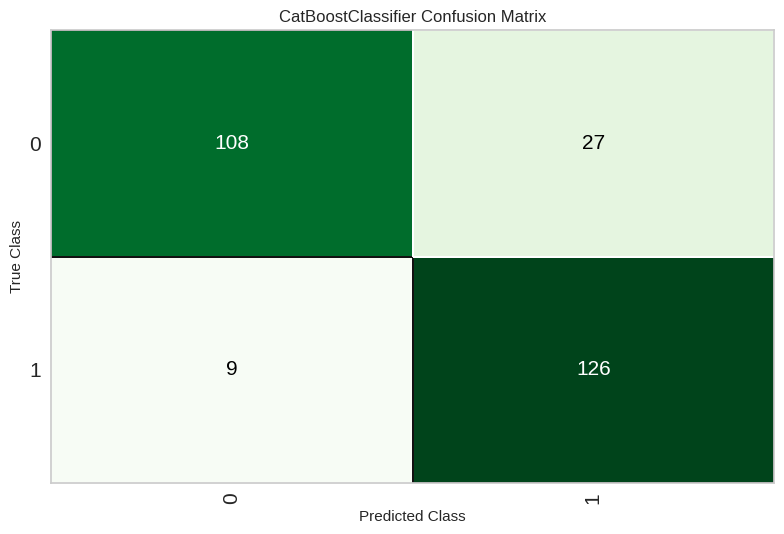

In [22]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

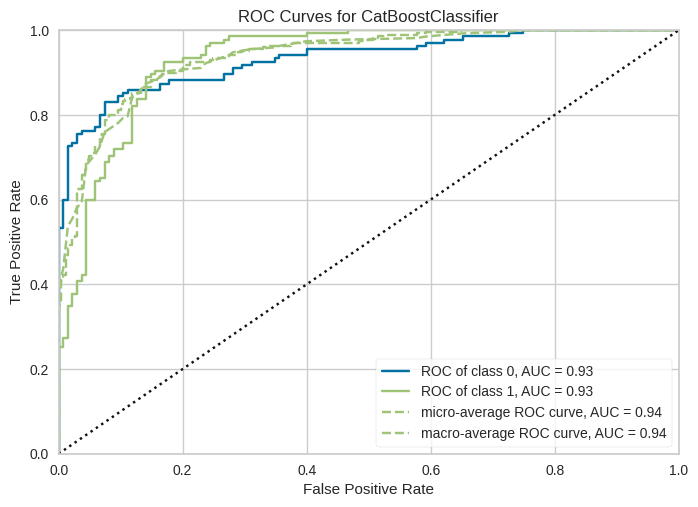

In [23]:
# plot AUC
plot_model(best, plot = 'auc')

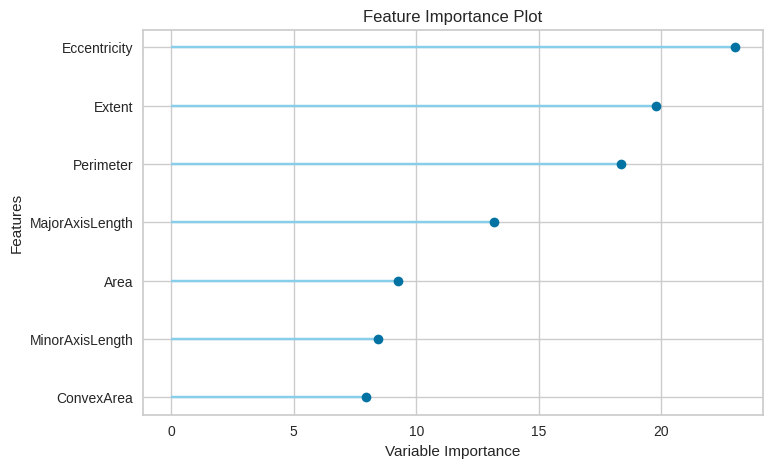

In [24]:
# plot feature importance
plot_model(best, plot = 'feature')

In [25]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8667,0.9324,0.8667,0.8733,0.8661,0.7333,0.7399


In [26]:
# show predictions df
holdout_pred.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,prediction_label,prediction_score
477,108314,455.605865,311.171112,0.730434,112497,0.686945,1306.577026,Besni,Besni,0.8805
376,70977,362.063568,256.383026,0.706096,73417,0.650223,1033.869995,Kecimen,Kecimen,0.6212
754,110785,560.007141,259.397339,0.886252,116070,0.558567,1456.756958,Besni,Besni,0.9900
630,99378,466.397461,275.575592,0.806774,102653,0.687038,1260.343018,Besni,Besni,0.9052
771,175946,604.530090,372.849854,0.787151,180289,0.775838,1622.808960,Besni,Besni,0.9959


In [27]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('Class', axis=1, inplace=True)
new_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [29]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,prediction_label,prediction_score
0,87524,442.246002,253.291153,0.819738,90546,0.758651,1184.040039,Kecimen,0.6134
1,75166,406.690674,243.032440,0.801805,78789,0.684130,1121.786011,Kecimen,0.8188
2,90856,442.267059,266.328308,0.798354,93717,0.637613,1208.574951,Kecimen,0.6787
3,45928,286.540558,208.760040,0.684989,47336,0.699599,844.161987,Kecimen,0.9585
4,79408,352.190765,290.827545,0.564011,81463,0.792772,1073.250977,Kecimen,0.9894


In [30]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'MajorAxisLength',
                                              'MinorAxisLength', 'Eccentricity',
                                              'ConvexArea', 'Extent',
                                              'Perimeter'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy

In [31]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Area', 'MajorAxisLength',
                                             'MinorAxisLength', 'Eccentricity',
                                             'ConvexArea', 'Extent',
                                             'Perimeter'],
                                    transformer=SimpleImputer(add_indica...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x787208a50370>)],
         verbose=False)